# Описание задачи

Датасет содержит информацию о сессиях посещении онлайн магазина пользователеми в течении 1 года. Таблица содержит 12330 записей о сессиях и 18 параметров. Данные разбиты на 2 класса на основании того была ли совершена покупка или нет (столбец Revenue).
Задача: определить на основании имещихся данных о посещении сайта будет ли совершена покупка в данной сессии или нет.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = './online_shoppers_intention.csv'
data = pd.read_csv(url)

data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [2]:
print(data.shape)
print(data.columns)

(12330, 18)
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


Столбцы "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" и "Product Related Duration" представляют информацию о колличестве посещения соответствующих страниц на сайте данного магазина и общее время, проведённое на этих страницах.
"Bounce Rate", "Exit Rate" and "Page Value" отображают измерения предоставленные сервисом Google Analytics.
Значение "Bounce Rate" показывает процент посетителей, которые зашли на сайт и вышли с него произведя никаких действий.
"Exit Rate" - процентное соотношение времени, проведённого на последней странице сайта, по отношению к общему времени сессии.
"Page Value" - среднее время проведённое на веб-странице до совершения покупки.
"Special Day" показывает близость к праздничным дням, в которые совершение покупки более вероятно, с учётом времени доставки. Данное значение изменяется на промежутке [0, 1].
Датасет включает также информацию об операционной системе, браузере, регионе и типе трафика, которое содержится в столбцах 'OperatingSystems', 'Browser', 'Region', 'TrafficType'.
Значение 'VisitorType' показывает посещал ли пользователь уже сайт или он новый.
Значение 'Weekend' - являлся ли день посещения выходным.

In [3]:
data['OperatingSystems']

0        1
1        2
2        4
3        3
4        3
        ..
12325    4
12326    3
12327    3
12328    2
12329    3
Name: OperatingSystems, Length: 12330, dtype: int64

In [4]:
data['VisitorType']

0        Returning_Visitor
1        Returning_Visitor
2        Returning_Visitor
3        Returning_Visitor
4        Returning_Visitor
               ...        
12325    Returning_Visitor
12326    Returning_Visitor
12327    Returning_Visitor
12328    Returning_Visitor
12329          New_Visitor
Name: VisitorType, Length: 12330, dtype: object

In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Отсюда видно, что пропущенных значений в таблице нет, или они заполнены 0.

In [6]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


Из таблицы корреляции видим большую кореляцию между столбцами ProductRelated и ProductRelated_Duration (= 0.860927). Стоит оставить только ProductRelated_Duration.
Также между BounceRates и ExitRates (= 0.913004). На мой взгяд, стоит оставить только столбец ExitRates, так как он более общий и включает в себя информацию представленную столбцом BounceRates.

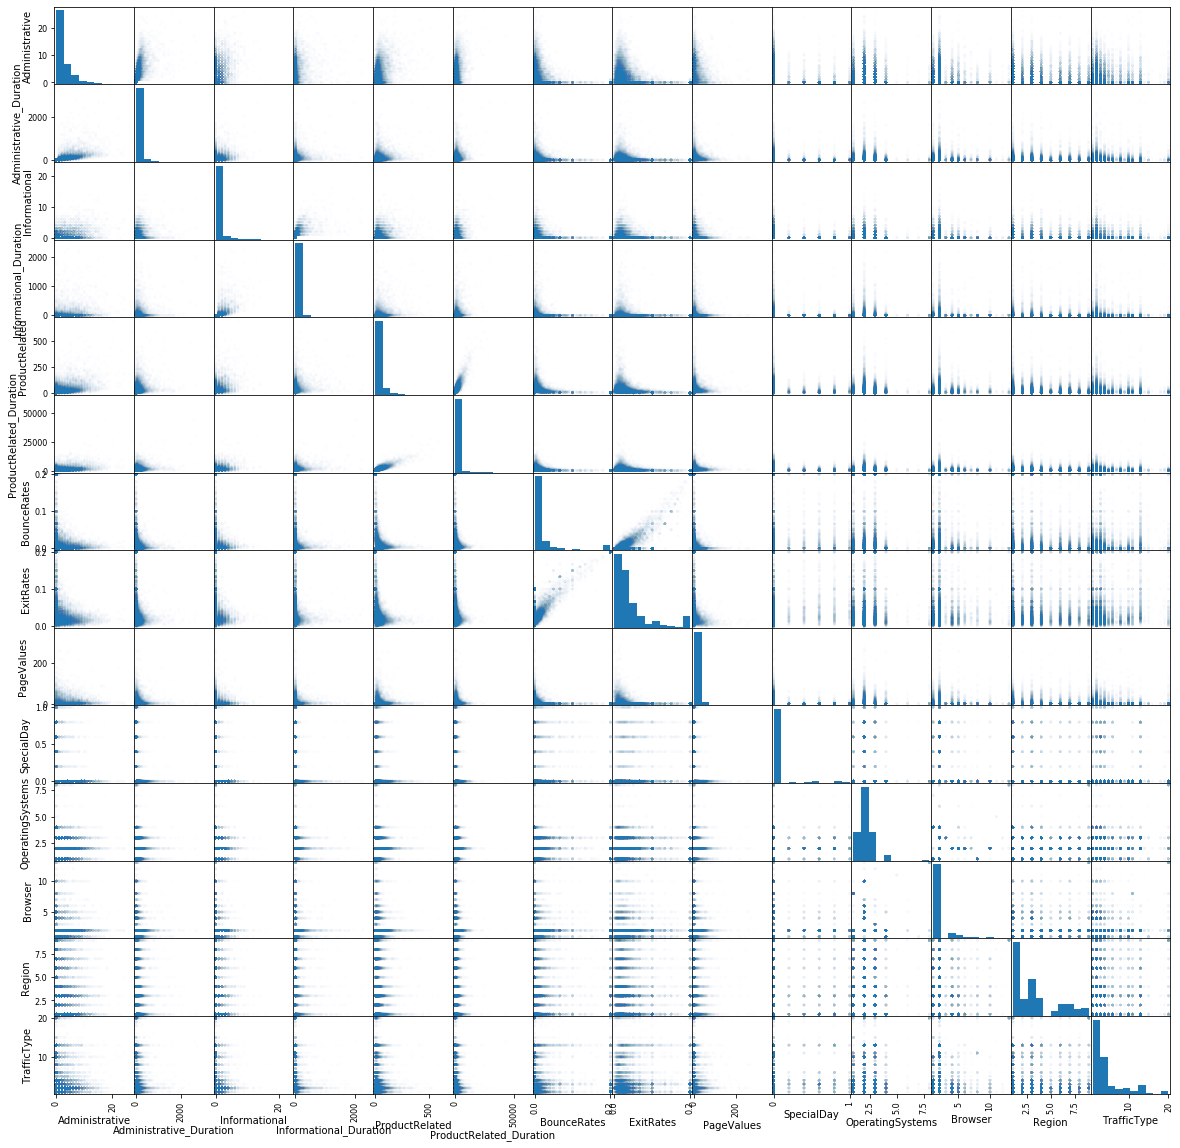

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[data.columns[:15]], alpha = .01, figsize = (20, 20))
pass

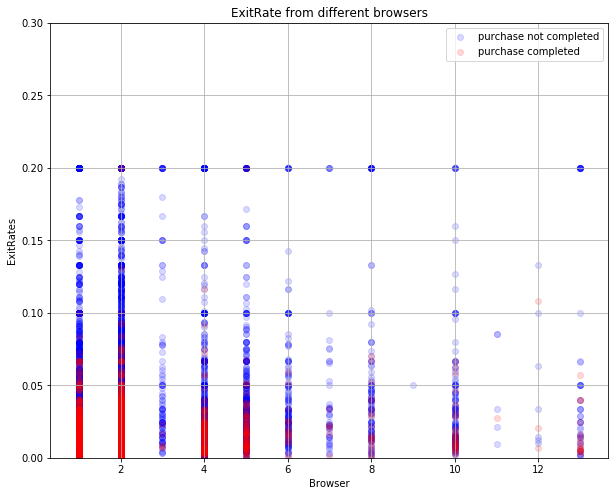

In [8]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['Revenue'] == False]['Browser'],
            data[data['Revenue'] == False]['ExitRates'],
            alpha = 0.15,
            label = 'purchase not completed',
            color = 'b')

plt.scatter(data[data['Revenue'] == True]['Browser'],
            data[data['Revenue'] == True]['ExitRates'],
            alpha = 0.15,
            label = 'purchase completed',
            color = 'r')


plt.xlabel('Browser')
plt.ylabel('ExitRates')
plt.ylim(0, 0.3)
plt.title('ExitRate from different browsers')
plt.legend()
plt.grid()

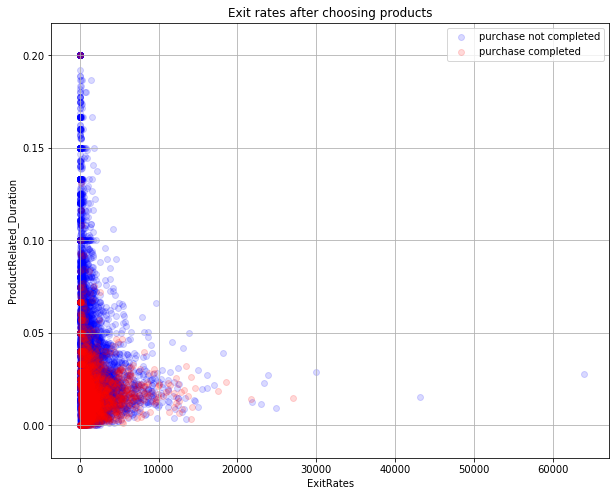

In [9]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['Revenue'] == False]['ProductRelated_Duration'],
            data[data['Revenue'] == False]['ExitRates'],
            alpha = 0.15,
            label = 'purchase not completed',
            color = 'b')

plt.scatter(data[data['Revenue'] == True]['ProductRelated_Duration'],
            data[data['Revenue'] == True]['ExitRates'],
            alpha = 0.15,
            label = 'purchase completed',
            color = 'r')


plt.xlabel('ExitRates')
plt.ylabel('ProductRelated_Duration')
plt.title('Exit rates after choosing products')
plt.legend()
plt.grid()

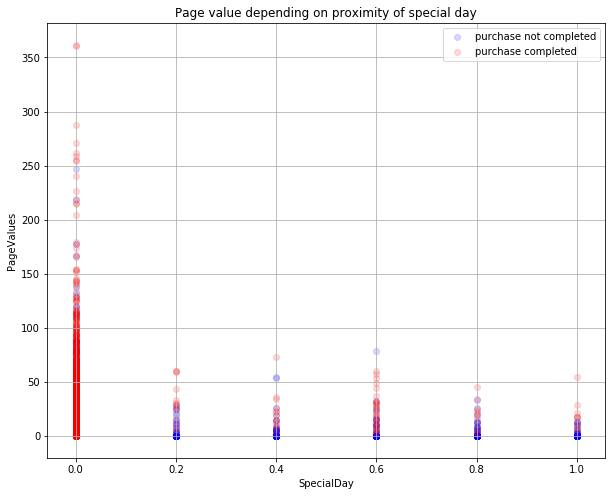

In [10]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['Revenue'] == False]['SpecialDay'],
            data[data['Revenue'] == False]['PageValues'],
            alpha = 0.15,
            label = 'purchase not completed',
            color = 'b')

plt.scatter(data[data['Revenue'] == True]['SpecialDay'],
            data[data['Revenue'] == True]['PageValues'],
            alpha = 0.15,
            label = 'purchase completed',
            color = 'r')


plt.xlabel('SpecialDay')
plt.ylabel('PageValues')
plt.title('Page value depending on proximity of special day')
plt.legend()
plt.grid()

Готовим данные
Заменим все переменные типа Boolean на 0 и 1

In [11]:
data = data.applymap(lambda x: 1 if x == True else x)
data = data.applymap(lambda x: 0 if x == False else x)

In [12]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Month', 'VisitorType']
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']


In [13]:
print(data['Month'].unique())
print(data['VisitorType'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']


Можно привести все категориальные значения к числовым, заменив месяца их номерами, а тип посетителей: Returning_Visitor=1, New_Visitor=0. Заметим при этом, что тип посетителей Other - не установлен, значит это пропущенные значения, будем рассматривать их New_Visitor.

In [14]:
data = data.applymap(lambda x: 1 if x == 'Feb' else x)
data = data.applymap(lambda x: 2 if x == 'Mar' else x)
data = data.applymap(lambda x: 4 if x == 'May' else x)
data = data.applymap(lambda x: 5 if x == 'June' else x)
data = data.applymap(lambda x: 6 if x == 'Jul' else x)
data = data.applymap(lambda x: 7 if x == 'Aug' else x)
data = data.applymap(lambda x: 8 if x == 'Sep' else x)
data = data.applymap(lambda x: 9 if x == 'Oct' else x)
data = data.applymap(lambda x: 10 if x == 'Nov' else x)
data = data.applymap(lambda x: 11 if x == 'Dec' else x)
data = data.applymap(lambda x: 1 if x == 'Returning_Visitor' else x)
data = data.applymap(lambda x: 0 if x == 'New_Visitor' or x == 'Other' else x)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,1,1,0


Также такие столбцы как 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend' и 'Revenue' являются категориальными, хоть и представлены числовыми значениями.

In [15]:
categorical_columns = data.iloc[:,10:18]
numerical_columns = data.iloc[:,0:10]
print(categorical_columns)
print(numerical_columns)

       Month  OperatingSystems  Browser  Region  TrafficType  VisitorType  \
0          1                 1        1       1            1            1   
1          1                 2        2       1            2            1   
2          1                 4        1       9            3            1   
3          1                 3        2       2            4            1   
4          1                 3        3       1            4            1   
...      ...               ...      ...     ...          ...          ...   
12325     11                 4        6       1            1            1   
12326     10                 3        2       1            8            1   
12327     10                 3        2       1           13            1   
12328     10                 2        2       3           11            1   
12329     10                 3        2       1            2            0   

       Weekend  Revenue  
0            0        0  
1            0        0

Удалим столбцы с высоким коэффициентом корреляции

In [16]:
numerical_columns = numerical_columns.drop('ProductRelated', axis=1)\
                                     .drop('BounceRates', axis=1)

In [17]:
print(numerical_columns.shape)

(12330, 8)


In [18]:
numerical_columns.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,1194.746220,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,1913.669288,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,184.137500,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,598.936905,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,1464.157213,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,63973.522230,0.200000,361.763742,1.000000


Стоит призвести нормализацию данных, так как некоторые значения, например ProductRelated_Duration, исчисляются в секундах и доходят нескольких тысяч, в то время как другие, например ExitRates представляются процентами и принимают значения от 0 до 1.

In [19]:
numerical_columns = (numerical_columns - numerical_columns.mean(axis = 0))/numerical_columns.std(axis = 0)
numerical_columns.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,7.423727e-16,8.782738e-16,-9.211204e-15,-3.737656e-15,-1.629029e-15,1.477086e-14,1.923630e-15,4.968604e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.969647e-01,-4.571729e-01,-3.964618e-01,-2.449206e-01,-6.243222e-01,-8.863347e-01,-3.171650e-01,-3.088088e-01
25%,-6.969647e-01,-4.571729e-01,-3.964618e-01,-2.449206e-01,-5.281000e-01,-5.923690e-01,-3.171650e-01,-3.088088e-01
50%,-3.959217e-01,-4.147470e-01,-3.964618e-01,-2.449206e-01,-3.113439e-01,-3.686764e-01,-3.171650e-01,-3.088088e-01
75%,5.072075e-01,7.035695e-02,-3.964618e-01,-2.449206e-01,1.407824e-01,1.425452e-01,-3.171650e-01,-3.088088e-01
max,7.431197e+00,1.876880e+01,1.849885e+01,1.786796e+01,3.280545e+01,3.229185e+00,1.916556e+01,4.718407e+00


In [20]:
data = pd.concat((numerical_columns, categorical_columns), axis=1)
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0.206164,0.363060,-0.396462,-0.244921,0.307809,-0.288954,0.342111,-0.308809,11,4,6,1,1,1,1,0
12326,-0.696965,-0.457173,-0.396462,-0.244921,-0.380942,-0.447346,-0.317165,-0.308809,10,3,2,1,8,1,1,0
12327,-0.696965,-0.457173,-0.396462,-0.244921,-0.528041,0.897057,-0.317165,-0.308809,10,3,2,1,13,1,1,0
12328,0.507207,-0.032915,-0.396462,-0.244921,-0.443518,-0.453122,-0.317165,-0.308809,10,2,2,3,11,1,0,0
12329,-0.696965,-0.457173,-0.396462,-0.244921,-0.613218,0.485505,-0.317165,-0.308809,10,3,2,1,2,0,1,0


Разобьём таблицу на X и Y и подготовим их для подачи на вход алгоритму

In [21]:
X = data.drop('Revenue', axis = 1)
Y = data['Revenue']
feature_names = X.columns
print(feature_names)
Y

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend'],
      dtype='object')


0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

In [22]:
X = X.to_numpy()
Y = np.array(Y)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

Разделим данные на тренировочную и тестовую выборки

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

8631 3699


# kNN

Запустим классификатор ближайших соседей
neighbors = 2

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [27]:
Y_train_predict = knn.predict(X_train)
err_train  = np.mean(Y_train  != Y_train_predict)
print(err_train)

0.0910670837678137


In [28]:
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test  != Y_test_predict)
print(err_test)

0.13517166801838335


neighbors = 7

In [29]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(30):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train, Y_train)

    Y_train_predict = knn.predict(X_train)
    err_train  = np.mean(Y_train  != Y_train_predict)
    print('neighbors=' + str(i+1) + ' err_train=' + str(err_train))

    Y_test_predict = knn.predict(X_test)
    err_test  = np.mean(Y_test  != Y_test_predict)
    print('neighbors=' + str(i+1) + ' err_test=' + str(err_test) + '\n\n')

neighbors=1 err_train=0.0
neighbors=1 err_test=0.1567991349013247


neighbors=2 err_train=0.0910670837678137
neighbors=2 err_test=0.13517166801838335


neighbors=3 err_train=0.08573745800023172
neighbors=3 err_test=0.1411192214111922


neighbors=4 err_train=0.10589734677325918
neighbors=4 err_test=0.12949445796161124


neighbors=5 err_train=0.1024215038813579
neighbors=5 err_test=0.1273317112733171


neighbors=6 err_train=0.11203800254895145
neighbors=6 err_test=0.1276020546093539


neighbors=7 err_train=0.10775112964893986
neighbors=7 err_test=0.12895377128953772


neighbors=8 err_train=0.11481867686247248
neighbors=8 err_test=0.12841308461746417


neighbors=9 err_train=0.11250144826787163
neighbors=9 err_test=0.13111651797783186


neighbors=10 err_train=0.11759935117599352
neighbors=10 err_test=0.1281427412814274


neighbors=11 err_train=0.11528212258139266
neighbors=11 err_test=0.13084617464179507


neighbors=12 err_train=0.11980071834086432
neighbors=12 err_test=0.12922411462557448

Минимальная ошибку алгоритм выдаёт при neighbors=14: err_train=0.12153863978681496, err_test=0.12706136793728035. Тестовая ошибка составляет примерно 12.7%.

# Метод SVM

In [30]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)

Y_train_predict = svc.predict(X_train)
Y_test_predict = svc.predict(X_test)
err_train = np.mean(Y_train != Y_train_predict)
err_test  = np.mean(Y_test  != Y_test_predict)

print(err_train, err_test)

0.09141466805700382 0.11597729115977291


Метод SVC показывает лучший результат: err_train=0.09141466805700382, err_test=0.11597729115977291. Тестовая ошибка составляет примерно 11.6%.

# PCA

Теперь применим Метод Главных Компонент (PCA) для сокращения сокращения пространства признаков.

In [31]:
print(len(feature_names))

15


Колличество признаков = 15. Большое колличество признаков может замедлять работу алгоритма, поэтому вначале сократим их до 2 признаков(главных компонент).

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_сomponents = pca.fit_transform(X)
principal_data = pd.DataFrame(data = principal_сomponents, columns = ['component 1', 'component 2'])
principal_data.head(10)

,component 1,component 2
0,-4.047891,-5.326328
1,-2.992227,-5.391496
2,-1.552929,-5.456657
3,-0.914556,-5.703338
4,-0.936402,-5.631488
5,-2.035297,-5.477737
6,-1.744594,-5.753976
7,-0.053206,-5.911075
8,-1.939651,-5.865442
9,-2.890793,-5.481584


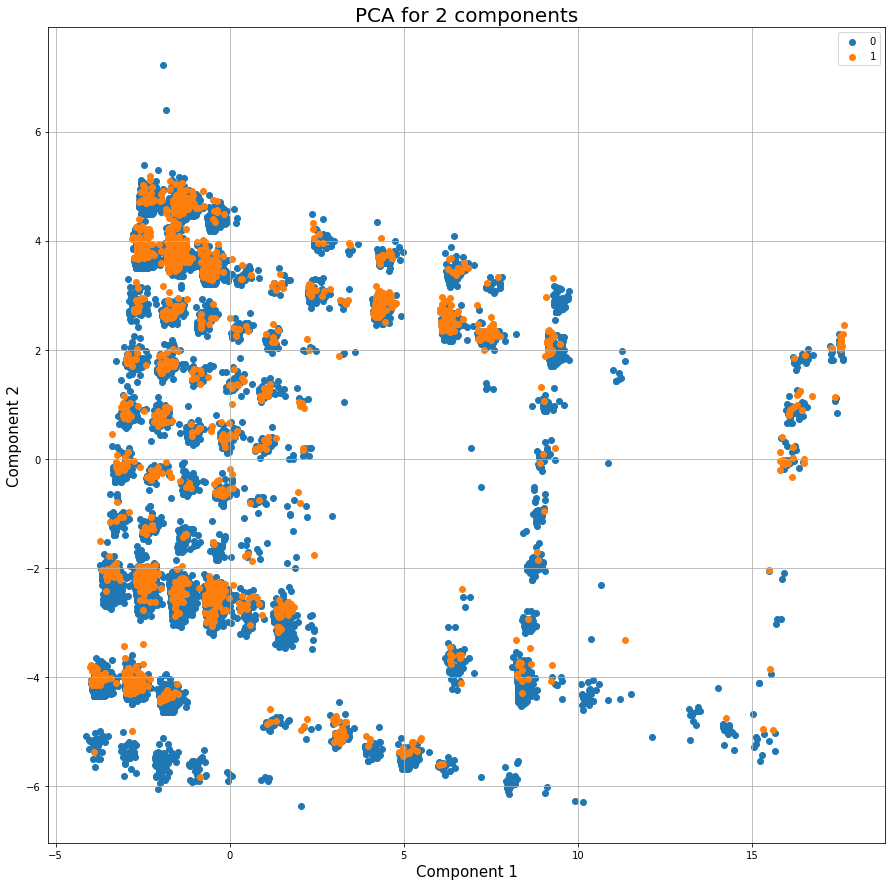

In [33]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize=15)
ax.set_ylabel('Component 2', fontsize=15)
ax.set_title('PCA for 2 components', fontsize=20)
targets = range(6)
colors = ['y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = Y == target
    ax.scatter(principal_data.loc[indicesToKeep, 'component 1'], principal_data.loc[indicesToKeep, 'component 2'])
ax.legend(targets)
ax.grid()

Данные сгруппированы кучками. При этом вторая компонента перекрывает первую, но занимает меньше площади.

In [34]:
explained_variance_ratio = pca.explained_variance_ratio_ 
names = ['component_1', 'component_2']
for name, var_ratio in zip(names, explained_variance_ratio):
    print('{}: {}%'.format(name, var_ratio * 100))
print('Суммарная доля информации: {}%'.format(sum(explained_variance_ratio) * 100))

component_1: 36.06302374693611%
component_2: 25.347057823571827%
Суммарная доля информации: 61.410081570507934%


Как мы видим суммарная доля информации составляет 61.4%, это значит, что при сокращении размерности мы потеряли почти 40% информации. При этом доля первой компоненты чуть выше доли второй компоненты. Из этого можно сделать вывод, что 2 компонент недостаточно.

Теперь решим задачу для двумерных данных

# SVM (PCA)

In [35]:
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

In [37]:
svc.fit(X_pca_train, Y_train)

Y_train_predict = svc.predict(X_pca_train)
Y_test_predict = svc.predict(X_pca_test)
err_train = np.mean(Y_train != Y_train_predict)
err_test  = np.mean(Y_test  != Y_test_predict)

print(err_train, err_test)

0.15444328583014713 0.15544741822114086


До применения метода главных компонент:
err_train = 0.09141466805700382
err_test = 0.11597729115977291
После:
err_train = 0.15444328583014713
err_test = 0.15544741822114086

После применения метода главных компонент ошибка на тренировочной и тестовой выборках немного возросла, что свидетельствует о неверном выборе колличества компонент или нецелесообразности использования этого метода.

# kNN (PCA)

In [38]:
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_pca_train, Y_train)

    Y_train_predict = knn.predict(X_pca_train)
    err_train  = np.mean(Y_train  != Y_train_predict)
    print('neighbors=' + str(i+1) + ' err_train=' + str(err_train))

    Y_test_predict = knn.predict(X_pca_test)
    err_test  = np.mean(Y_test  != Y_test_predict)
    print('neighbors=' + str(i+1) + ' err_test=' + str(err_test) + '\n\n')

neighbors=1 err_train=0.0
neighbors=1 err_test=0.3044065963773993


neighbors=2 err_train=0.1121538639786815
neighbors=2 err_test=0.214382265477156


neighbors=3 err_train=0.10960491252462055
neighbors=3 err_test=0.24817518248175183


neighbors=4 err_train=0.13069169273548836
neighbors=4 err_test=0.1730197350635307


neighbors=5 err_train=0.12906963271926775
neighbors=5 err_test=0.1811300351446337


neighbors=6 err_train=0.13613717993280036
neighbors=6 err_test=0.16112462827791296


neighbors=7 err_train=0.13602131850307034
neighbors=7 err_test=0.16680183833468504


neighbors=8 err_train=0.13984474568416175
neighbors=8 err_test=0.1600432549337659


neighbors=9 err_train=0.14100335998146218
neighbors=9 err_test=0.1678832116788321


neighbors=10 err_train=0.14366817286525316
neighbors=10 err_test=0.16220600162206


neighbors=11 err_train=0.1454060943112038
neighbors=11 err_test=0.17572316842389835


neighbors=12 err_train=0.14471092573282354
neighbors=12 err_test=0.16058394160583941


ne

До применения PCA лучший результат был:
при neighbors=14
err_train=0.12153863978681496
err_test=0.12706136793728035
После:
neighbors=30
err_train=0.15258950295446647
err_test=0.15571776155717762

Наблюдаем такое же поведение как и для SVM.

Теперь попробуем изменить колличество главных компонент и повторить эксперимент.

In [41]:
components = range(2, len(feature_names), 1)

# SVM

In [63]:
err_train_arr = []
err_test_arr = []
for i in components:
    pca = PCA(n_components=i)
    pca.fit(X)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)
    svc.fit(X_pca_train, Y_train)
    Y_train_predict = svc.predict(X_pca_train)
    Y_test_predict = svc.predict(X_pca_test)
    err_train_arr.append(np.mean(Y_train != Y_train_predict))
    err_test_arr.append(np.mean(Y_test != Y_test_predict))

Min train error 0.08874985517321284 with 14 components
Max train error 0.15444328583014713 with 2 components
Min test error 0.11273317112733171 with 11 components
Max test error 0.15544741822114086 with 2 components


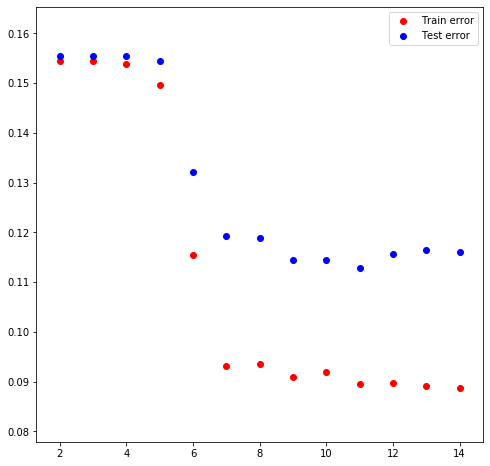

In [64]:
figure = plt.figure(figsize=(8, 8))
ax = figure.add_subplot(1,1,1)
colors = ['r', 'b']
ax.scatter(components, err_train_arr, color=colors[0])
ax.scatter(components, err_test_arr, color=colors[1])
ax.legend(['Train error', 'Test error'])

best_train_result = np.argmin(err_train_arr)
best_test_result = np.argmin(err_test_arr)
worst_train_result = np.argmax(err_train_arr)
worst_test_result = np.argmax(err_test_arr)

print("Min train error {} with {} components".format(err_train_arr[best_train_result], components[best_train_result]))
print("Max train error {} with {} components".format(err_train_arr[worst_train_result], components[worst_train_result]))
print("Min test error {} with {} components".format(err_test_arr[best_test_result], components[best_test_result]))
print("Max test error {} with {} components".format(err_test_arr[worst_test_result], components[worst_test_result]))

# kNN

In [66]:
err_train_arr = []
err_test_arr = []
n_neighbors = []
for i in components:
    pca = PCA(n_components=i)
    pca.fit(X)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)
    for j in range(30):
        max_err_train = 1
        max_err_test = 1
        knn = KNeighborsClassifier(n_neighbors=j+1)
        knn.fit(X_pca_train, Y_train)
        Y_train_predict = knn.predict(X_pca_train)
        Y_test_predict = knn.predict(X_pca_test)
        if np.mean(Y_test != Y_test_predict) < max_err_test:
            max_err_train = np.mean(Y_train != Y_train_predict)
            max_err_test = np.mean(Y_test != Y_test_predict)
            best_neighbor = j+1
    err_train_arr.append(max_err_train)
    err_test_arr.append(max_err_test)
    n_neighbors.append(best_neighbor)

Min train error 0.1267524041246669 with 30 neighbors and 9 components
Max train error 0.15340053296257675 with 30 neighbors and 5 components
Min test error 0.12841308461746417 with 30 neighbors and 10 components
Max test error 0.1567991349013247 with 30 neighbors and 5 components


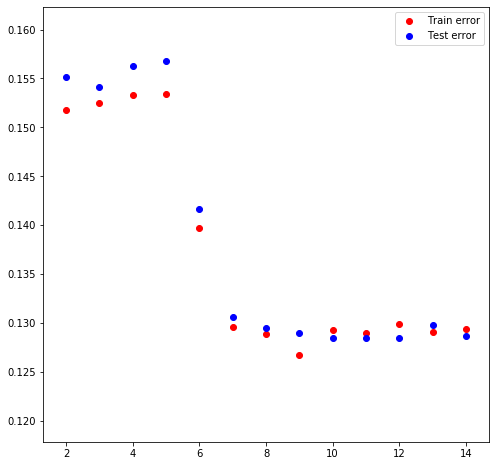

In [69]:
figure = plt.figure(figsize=(8, 8))
ax = figure.add_subplot(1,1,1)
colors = ['r', 'b']
ax.scatter(components, err_train_arr, color=colors[0])
ax.scatter(components, err_test_arr, color=colors[1])
ax.legend(['Train error', 'Test error'])

best_train_result = np.argmin(err_train_arr)
best_test_result = np.argmin(err_test_arr)
worst_train_result = np.argmax(err_train_arr)
worst_test_result = np.argmax(err_test_arr)

print("Min train error {} with {} neighbors and {} components".format(err_train_arr[best_train_result], n_neighbors[best_train_result], components[best_train_result]))
print("Max train error {} with {} neighbors and {} components".format(err_train_arr[worst_train_result], n_neighbors[worst_train_result], components[worst_train_result]))
print("Min test error {} with {} neighbors and {} components".format(err_test_arr[best_test_result], n_neighbors[best_test_result], components[best_test_result]))
print("Max test error {} with {} neighbors and {} components".format(err_test_arr[worst_test_result], n_neighbors[worst_test_result], components[worst_test_result]))

На графиках можно наблюдать, что с увеличением числа главных компонент результат работы обоих методов (SVM и kNN) улучшается. При 7 главных компонентах происходит резкое уменьшение значения ошибки, а затем значение ошибки слегка колеблется.

Метод SVM показал лучший результат: Min test error 0.11273317112733171 with 11 components, который оказался лучше, чем без использования PCA: Min test error 0.11597729115977291.

Метод kNN показал лучший результат: Min test error 0.12841308461746417 with 30 neighbors and 10 components, без использования PCA: Min test error 0.12706136793728035 with 14 neighbors.